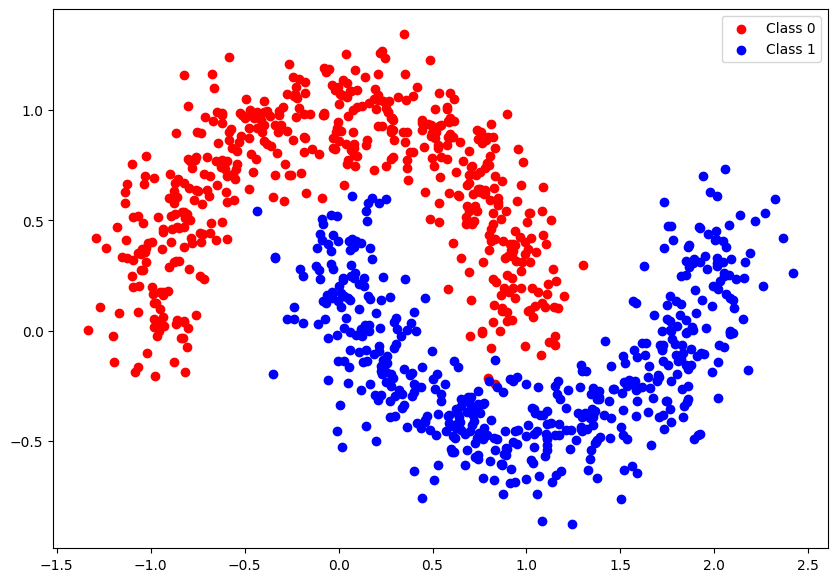

In [11]:
# 1. make binary classification model on make_moons dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

RANDOM_SEED = 42
X, y = make_moons(n_samples=1000, noise=0.15, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# plot the dataset
plt.figure(figsize=(10, 7))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.show()

In [12]:
# convert data to tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# create model

model_moons_binary = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

# loss function and optimizer
LEARNING_RATE = 0.01
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_moons_binary.parameters(), lr=LEARNING_RATE)



In [13]:
# train the model
EPOCHS = 5000

for epoch in range(EPOCHS):
  model_moons_binary.train()
  y_pred = model_moons_binary(X_train)

  loss = loss_fn(y_pred, y_train.view(-1, 1))

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    model_moons_binary.eval()
    with torch.inference_mode():
      y_pred = model_moons_binary(X_test)
      y_pred = (y_pred > 0.5).float()
      accuracy = y_pred.eq(y_test.view_as(y_pred)).sum() / y_test.shape[0]

      print(f'Epoch: {epoch}, Loss: {loss.item()}, Accuracy: {accuracy.item()}')



Epoch: 0, Loss: 0.7178980112075806, Accuracy: 0.6949999928474426
Epoch: 100, Loss: 0.017765957862138748, Accuracy: 1.0
Epoch: 200, Loss: 0.012373150326311588, Accuracy: 1.0
Epoch: 300, Loss: 0.010659264400601387, Accuracy: 1.0
Epoch: 400, Loss: 0.009446484036743641, Accuracy: 1.0
Epoch: 500, Loss: 0.008592617698013783, Accuracy: 1.0
Epoch: 600, Loss: 0.00789306964725256, Accuracy: 1.0
Epoch: 700, Loss: 0.007398188579827547, Accuracy: 1.0
Epoch: 800, Loss: 0.006675835698843002, Accuracy: 1.0
Epoch: 900, Loss: 0.0059636617079377174, Accuracy: 1.0
Epoch: 1000, Loss: 0.005475697573274374, Accuracy: 1.0
Epoch: 1100, Loss: 0.00485212029889226, Accuracy: 1.0
Epoch: 1200, Loss: 0.0038756367284804583, Accuracy: 1.0
Epoch: 1300, Loss: 0.003192082978785038, Accuracy: 1.0
Epoch: 1400, Loss: 0.0026168725453317165, Accuracy: 1.0
Epoch: 1500, Loss: 0.0024134342093020678, Accuracy: 1.0
Epoch: 1600, Loss: 0.0021542662288993597, Accuracy: 1.0
Epoch: 1700, Loss: 0.0019184388220310211, Accuracy: 1.0
Epoch

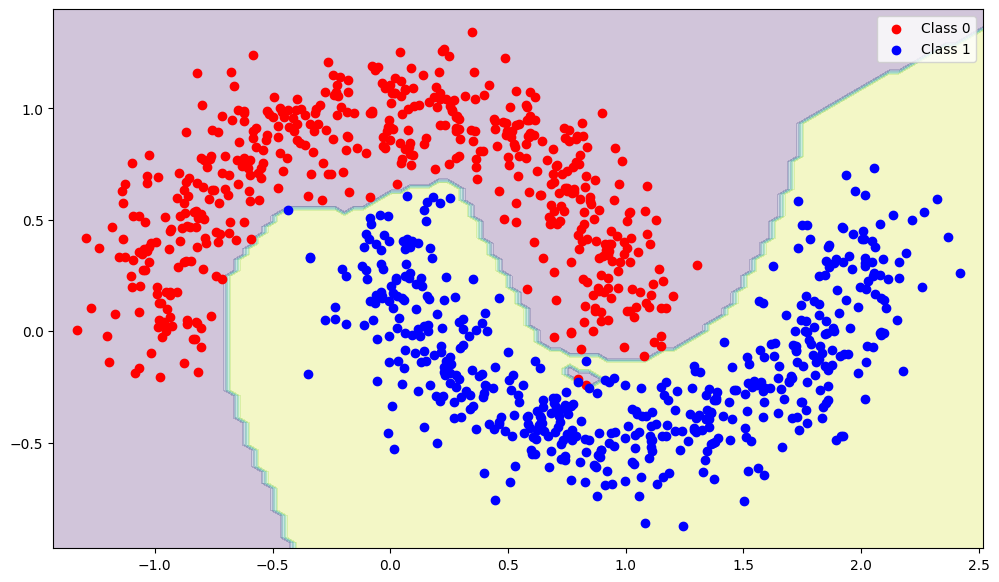

In [14]:
#visualize the decision boundary

def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  X_grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
  y_pred = model(X_grid)
  y_pred = (y_pred > 0.5).float()

  plt.contourf(xx, yy, y_pred.view(xx.shape).detach().numpy(), alpha=0.25)
  plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
  plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
  plt.legend()

plt.figure(figsize=(12, 7))
plot_decision_boundary(X, y, model_moons_binary)
plt.show()

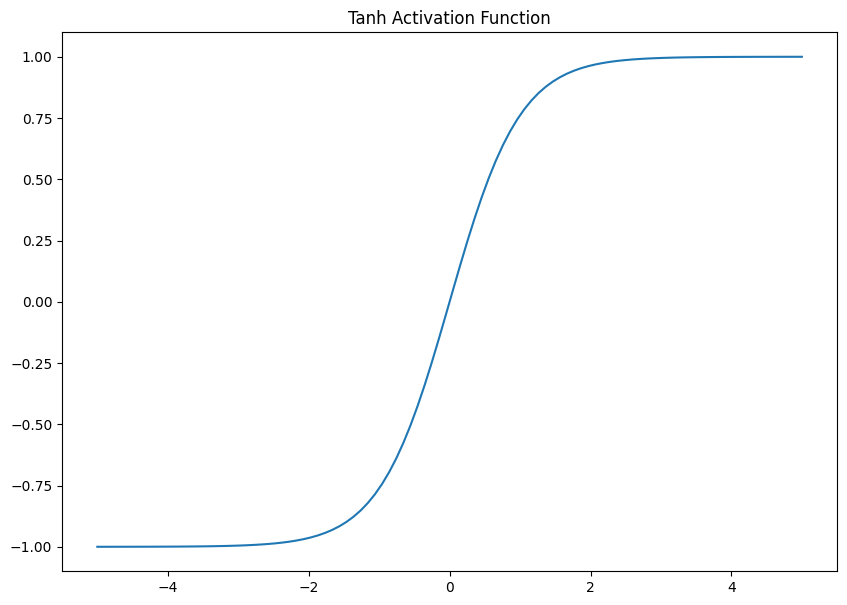

In [15]:
# Replicate the tanh activation function and display it

x = torch.linspace(-5, 5, 100)
y = torch.tanh(x)
plt.figure(figsize=(10, 7))
plt.plot(x.numpy(), y.numpy())
plt.title('Tanh Activation Function')
plt.show()

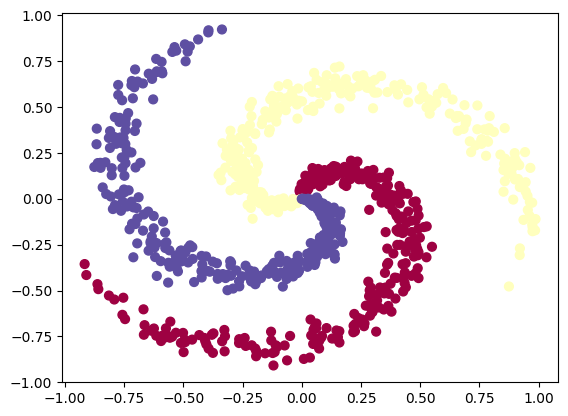

In [35]:
# Create a multi-class dataset using the spirals data creation function from CS231n 

# Code for creating a spiral dataset from CS231n
import numpy as np
N = 300 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [37]:
print(X.shape, y.shape)

(900, 2) (900,)


In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# convert data to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [40]:
print(X_train[:5], y_train[:5])

tensor([[ 0.0117,  0.0313],
        [-0.1111, -0.0242],
        [-0.3242, -0.7489],
        [ 0.0818, -0.2477],
        [-0.0162, -0.0118]]) tensor([0, 1, 0, 2, 1])


In [41]:
# create model

model_spirals = nn.Sequential(
    nn.Linear(2, 64),
    nn.Tanh(),
    nn.Linear(64, 32),
    nn.Tanh(),
    nn.Linear(32, 3)
)

# loss function and optimizer
LEARNING_RATE = 0.01
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_spirals.parameters(), lr=LEARNING_RATE)


In [42]:
EPOCHS = 5000

for epoch in range(EPOCHS):
  model_spirals.train()
  y_pred = model_spirals(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    model_spirals.eval()
    with torch.inference_mode():
      y_pred = model_spirals(X_test)
      loss = loss_fn(y_pred, y_test)
      y_pred = torch.argmax(y_pred, axis=1)
      accuracy = y_pred.eq(y_test).sum() / y_test.shape[0]

      print(f'Epoch: {epoch}, Loss: {loss.item()}, Accuracy: {accuracy.item()}')

Epoch: 0, Loss: 1.0228400230407715, Accuracy: 0.47777777910232544
Epoch: 100, Loss: 0.08589985966682434, Accuracy: 0.9888888597488403
Epoch: 200, Loss: 0.05606923997402191, Accuracy: 0.9888888597488403
Epoch: 300, Loss: 0.05608052760362625, Accuracy: 0.9888888597488403
Epoch: 400, Loss: 0.05869338661432266, Accuracy: 0.9888888597488403
Epoch: 500, Loss: 0.06045303866267204, Accuracy: 0.9888888597488403
Epoch: 600, Loss: 0.06176888570189476, Accuracy: 0.9888888597488403
Epoch: 700, Loss: 0.05971956253051758, Accuracy: 0.9888888597488403
Epoch: 800, Loss: 0.057105932384729385, Accuracy: 0.9888888597488403
Epoch: 900, Loss: 0.054222382605075836, Accuracy: 0.9888888597488403
Epoch: 1000, Loss: 0.0498010478913784, Accuracy: 0.9888888597488403
Epoch: 1100, Loss: 0.04486303776502609, Accuracy: 0.9888888597488403
Epoch: 1200, Loss: 0.03922901675105095, Accuracy: 0.9888888597488403
Epoch: 1300, Loss: 0.03288627415895462, Accuracy: 0.9944444298744202
Epoch: 1400, Loss: 0.02529510110616684, Accur

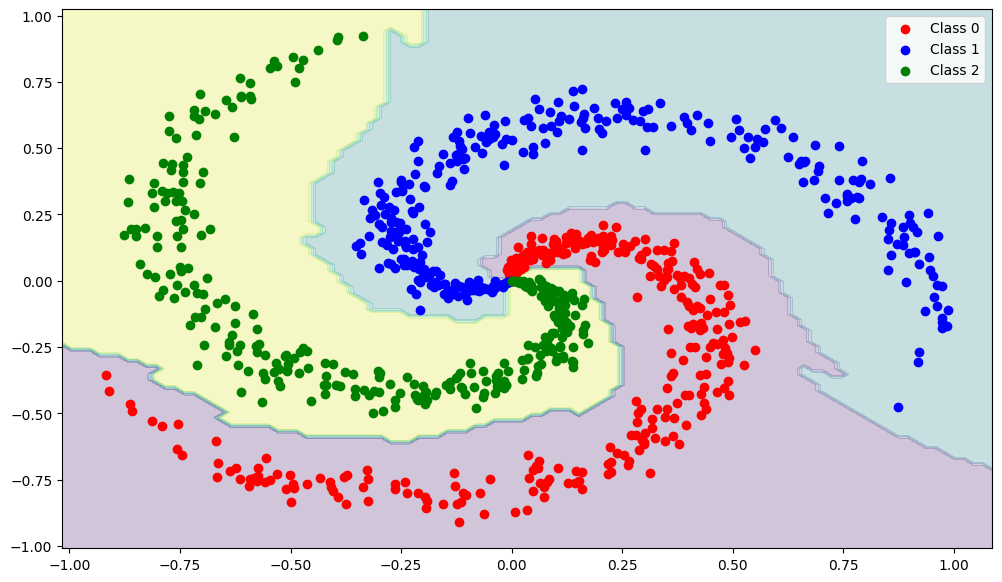

In [43]:
#visualize the decision boundary

def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  X_grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
  y_pred = model(X_grid)
  y_pred = torch.argmax(y_pred, axis=1)

  plt.contourf(xx, yy, y_pred.view(xx.shape).detach().numpy(), alpha=0.25)
  plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
  plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
  plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='green', label='Class 2')
  plt.legend()

plt.figure(figsize=(12, 7))
plot_decision_boundary(X, y, model_spirals)
plt.show()